In [1]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
import tensorflow as tf
set_random_seed(42)
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import seaborn as sns
from matplotlib import pyplot as plt

c:\dev\advanced_neural_networks\env\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
import tensorflow as tf 
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
def load_data():
    TRAIN_DATA = "./ch2_train.csv"
    df = pd.read_csv(TRAIN_DATA)
    y = df.iloc[:, 10]
    X = df.iloc[:, 0:10]
    print(y[0:5])
    print(X[0:5])
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    X_val, X_test, y_val, y_test = train_test_split(X,y, test_size = 0.5)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
# COMPLETE THIS FUNCTION

def build_network(input_features=None):
    # first we specify an input layer, with a shape == features
    inputs = Input(shape=(input_features,), name="input")
    
    # One or more layers should go here !!!!
    x = Dense(32, activation='relu', name="hidden1")(inputs)
    x = Dense(32, activation='relu', name="hidden2")(x)
    #x = Dense(32, activation='relu', name="hidden3")(x)
    # for regression we will use a single neuron with linear (no) activation
    prediction = Dense(1, activation='linear', name="final")(x)

    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse','mape','cosine','acc'])
    return model

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

0   -1.492607
1    0.001870
2   -3.026610
3    2.582999
4   -1.375630
Name: y, dtype: float64
         x0        x1        x2        x3        x4        x5        x6  \
0  0.002180  0.009120 -0.013605 -0.008808  0.001073 -0.000740  0.002386   
1  0.004854 -0.003313 -0.001952  0.002670 -0.006725 -0.002017 -0.002849   
2 -0.003369 -0.006110 -0.006696 -0.022039 -0.000381  0.003571 -0.007350   
3  0.004071  0.006069  0.001937  0.006065 -0.007948  0.000772  0.012258   
4 -0.003275  0.005618  0.003749 -0.011370  0.000889 -0.001856  0.000228   

         x7        x8        x9  
0 -0.005520 -0.014143  0.001899  
1  0.000822  0.008339  0.002317  
2 -0.000669 -0.016077 -0.006384  
3  0.008331  0.017416  0.002310  
4 -0.007770 -0.016849  0.000354  


In [6]:
print("Shape X_train:" + str(X_train.shape))
print("Shape X_val:" + str(X_val.shape))
print("Shape X_test :" + str(X_test.shape))

Shape X_train:(3200, 10)
Shape X_val:(2000, 10)
Shape X_test :(2000, 10)


In [7]:
input_features = X_train.shape[1]
model = build_network(input_features=input_features)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 10)                0         
_________________________________________________________________
hidden1 (Dense)              (None, 32)                352       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
final (Dense)                (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Trainable Params: " + str(1441))

Trainable Params: 1441


In [10]:
# Fit your MLP
# You may choose to adjust the number of epochs, batch size, or model to get a better result.
model.fit(x=X_train.values, y=y_train, batch_size=10, epochs=200, verbose=1, validation_data=(X_val.values, y_val))

Train on 3200 samples, validate on 2000 samples
Epoch 1/200
3200/3200 [==============================] - 3s 856us/step - loss: 1.2167 - mean_absolute_error: 0.8783 - mean_squared_error: 1.2167 - mean_absolute_percentage_error: 107.3645 - cosine_proximity: -0.4563 - acc: 0.0000e+00 - val_loss: 0.6322 - val_mean_absolute_error: 0.6336 - val_mean_squared_error: 0.6322 - val_mean_absolute_percentage_error: 94.6254 - val_cosine_proximity: -0.8100 - val_acc: 0.0000e+00
Epoch 2/200
3200/3200 [==============================] - 1s 448us/step - loss: 0.1948 - mean_absolute_error: 0.3126 - mean_squared_error: 0.1948 - mean_absolute_percentage_error: 91.8754 - cosine_proximity: -0.8463 - acc: 0.0000e+00 - val_loss: 0.0310 - val_mean_absolute_error: 0.1376 - val_mean_squared_error: 0.0310 - val_mean_absolute_percentage_error: 52.3112 - val_cosine_proximity: -0.9100 - val_acc: 0.0000e+00
Epoch 3/200
3200/3200 [==============================] - 1s 457us/step - loss: 0.0132 - mean_absolute_error: 0.07

Epoch 20/200
3200/3200 [==============================] - 2s 526us/step - loss: 6.7324e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 6.7324e-06 - mean_absolute_percentage_error: 0.6706 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 8.1612e-06 - val_mean_absolute_error: 0.0023 - val_mean_squared_error: 8.1612e-06 - val_mean_absolute_percentage_error: 1.0894 - val_cosine_proximity: -0.9980 - val_acc: 0.0000e+00
Epoch 21/200
3200/3200 [==============================] - 2s 585us/step - loss: 6.1197e-05 - mean_absolute_error: 0.0053 - mean_squared_error: 6.1197e-05 - mean_absolute_percentage_error: 2.2267 - cosine_proximity: -0.9981 - acc: 0.0000e+00 - val_loss: 1.5753e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.5753e-06 - val_mean_absolute_percentage_error: 0.4632 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 22/200
3200/3200 [==============================] - 1s 437us/step - loss: 8.2861e-06 - mean_absolute_error: 0.0022 - mean_squa

Epoch 39/200
3200/3200 [==============================] - 2s 626us/step - loss: 1.5824e-05 - mean_absolute_error: 0.0024 - mean_squared_error: 1.5824e-05 - mean_absolute_percentage_error: 1.1454 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 8.5650e-06 - val_mean_absolute_error: 0.0024 - val_mean_squared_error: 8.5650e-06 - val_mean_absolute_percentage_error: 1.1747 - val_cosine_proximity: -0.9970 - val_acc: 0.0000e+00
Epoch 40/200
3200/3200 [==============================] - 2s 617us/step - loss: 6.3204e-05 - mean_absolute_error: 0.0046 - mean_squared_error: 6.3204e-05 - mean_absolute_percentage_error: 1.9229 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 1.3733e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 1.3733e-06 - val_mean_absolute_percentage_error: 0.4863 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 41/200
3200/3200 [==============================] - 2s 608us/step - loss: 6.7795e-06 - mean_absolute_error: 0.0019 - mean_squa

Epoch 58/200
3200/3200 [==============================] - 2s 713us/step - loss: 9.0933e-07 - mean_absolute_error: 6.7590e-04 - mean_squared_error: 9.0933e-07 - mean_absolute_percentage_error: 0.3327 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 1.1539e-06 - val_mean_absolute_error: 8.6654e-04 - val_mean_squared_error: 1.1539e-06 - val_mean_absolute_percentage_error: 0.4282 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 59/200
3200/3200 [==============================] - 2s 671us/step - loss: 2.8520e-05 - mean_absolute_error: 0.0028 - mean_squared_error: 2.8520e-05 - mean_absolute_percentage_error: 1.1444 - cosine_proximity: -0.9981 - acc: 0.0000e+00 - val_loss: 4.2558e-06 - val_mean_absolute_error: 0.0017 - val_mean_squared_error: 4.2558e-06 - val_mean_absolute_percentage_error: 0.8323 - val_cosine_proximity: -0.9980 - val_acc: 0.0000e+00
Epoch 60/200
3200/3200 [==============================] - 2s 683us/step - loss: 1.0037e-05 - mean_absolute_error: 0.0022 - m

Epoch 77/200
3200/3200 [==============================] - 2s 647us/step - loss: 3.8204e-05 - mean_absolute_error: 0.0046 - mean_squared_error: 3.8204e-05 - mean_absolute_percentage_error: 2.2468 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 9.3207e-07 - val_mean_absolute_error: 7.6845e-04 - val_mean_squared_error: 9.3207e-07 - val_mean_absolute_percentage_error: 0.3646 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 78/200
3200/3200 [==============================] - 2s 636us/step - loss: 8.8391e-05 - mean_absolute_error: 0.0051 - mean_squared_error: 8.8391e-05 - mean_absolute_percentage_error: 2.4672 - cosine_proximity: -0.9969 - acc: 0.0000e+00 - val_loss: 1.3520e-05 - val_mean_absolute_error: 0.0030 - val_mean_squared_error: 1.3520e-05 - val_mean_absolute_percentage_error: 1.2478 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 79/200
3200/3200 [==============================] - 2s 643us/step - loss: 8.9943e-06 - mean_absolute_error: 0.0014 - mean_

Epoch 96/200
3200/3200 [==============================] - 2s 675us/step - loss: 2.9871e-05 - mean_absolute_error: 0.0031 - mean_squared_error: 2.9871e-05 - mean_absolute_percentage_error: 1.1996 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 9.7506e-08 - val_mean_absolute_error: 2.4810e-04 - val_mean_squared_error: 9.7506e-08 - val_mean_absolute_percentage_error: 0.0938 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 97/200
3200/3200 [==============================] - 2s 571us/step - loss: 4.7488e-05 - mean_absolute_error: 0.0040 - mean_squared_error: 4.7488e-05 - mean_absolute_percentage_error: 1.5838 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 2.1971e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 2.1971e-06 - val_mean_absolute_percentage_error: 0.5809 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 98/200
3200/3200 [==============================] - 2s 522us/step - loss: 6.8097e-05 - mean_absolute_error: 0.0039 - mean_

Epoch 115/200
3200/3200 [==============================] - 2s 488us/step - loss: 1.3818e-04 - mean_absolute_error: 0.0084 - mean_squared_error: 1.3818e-04 - mean_absolute_percentage_error: 3.4650 - cosine_proximity: -0.9937 - acc: 0.0000e+00 - val_loss: 1.5076e-06 - val_mean_absolute_error: 9.6380e-04 - val_mean_squared_error: 1.5076e-06 - val_mean_absolute_percentage_error: 0.3973 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 116/200
3200/3200 [==============================] - 2s 491us/step - loss: 7.9148e-07 - mean_absolute_error: 5.9853e-04 - mean_squared_error: 7.9148e-07 - mean_absolute_percentage_error: 0.2995 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 7.7039e-08 - val_mean_absolute_error: 2.4063e-04 - val_mean_squared_error: 7.7039e-08 - val_mean_absolute_percentage_error: 0.1032 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 117/200
3200/3200 [==============================] - 2s 482us/step - loss: 3.0725e-07 - mean_absolute_error: 3.9

Epoch 134/200
3200/3200 [==============================] - 2s 573us/step - loss: 6.9065e-05 - mean_absolute_error: 0.0054 - mean_squared_error: 6.9065e-05 - mean_absolute_percentage_error: 2.6326 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 8.2702e-05 - val_mean_absolute_error: 0.0074 - val_mean_squared_error: 8.2702e-05 - val_mean_absolute_percentage_error: 3.3538 - val_cosine_proximity: -0.9960 - val_acc: 0.0000e+00
Epoch 135/200
3200/3200 [==============================] - 2s 557us/step - loss: 3.8804e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 3.8804e-05 - mean_absolute_percentage_error: 1.1453 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 3.8489e-07 - val_mean_absolute_error: 5.7896e-04 - val_mean_squared_error: 3.8489e-07 - val_mean_absolute_percentage_error: 0.2474 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 136/200
3200/3200 [==============================] - 2s 558us/step - loss: 4.9433e-07 - mean_absolute_error: 4.6078e-04 

Epoch 153/200
3200/3200 [==============================] - 2s 597us/step - loss: 3.9944e-05 - mean_absolute_error: 0.0043 - mean_squared_error: 3.9944e-05 - mean_absolute_percentage_error: 1.9355 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 3.5229e-06 - val_mean_absolute_error: 0.0017 - val_mean_squared_error: 3.5229e-06 - val_mean_absolute_percentage_error: 0.7739 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 154/200
3200/3200 [==============================] - 2s 681us/step - loss: 1.0235e-05 - mean_absolute_error: 0.0026 - mean_squared_error: 1.0235e-05 - mean_absolute_percentage_error: 1.1148 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 2.6818e-05 - val_mean_absolute_error: 0.0050 - val_mean_squared_error: 2.6818e-05 - val_mean_absolute_percentage_error: 2.1932 - val_cosine_proximity: -0.9960 - val_acc: 0.0000e+00
Epoch 155/200
3200/3200 [==============================] - 2s 697us/step - loss: 1.3624e-04 - mean_absolute_error: 0.0071 - mean_s

Epoch 172/200
3200/3200 [==============================] - 2s 527us/step - loss: 2.5467e-05 - mean_absolute_error: 0.0032 - mean_squared_error: 2.5467e-05 - mean_absolute_percentage_error: 1.4563 - cosine_proximity: -0.9987 - acc: 0.0000e+00 - val_loss: 4.9583e-07 - val_mean_absolute_error: 5.6383e-04 - val_mean_squared_error: 4.9583e-07 - val_mean_absolute_percentage_error: 0.2248 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 173/200
3200/3200 [==============================] - 2s 497us/step - loss: 9.7016e-05 - mean_absolute_error: 0.0056 - mean_squared_error: 9.7016e-05 - mean_absolute_percentage_error: 3.0973 - cosine_proximity: -0.9962 - acc: 0.0000e+00 - val_loss: 3.0418e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 3.0418e-06 - val_mean_absolute_percentage_error: 0.7322 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 174/200
3200/3200 [==============================] - 2s 505us/step - loss: 7.6581e-07 - mean_absolute_error: 5.8576e-04 

Epoch 191/200
3200/3200 [==============================] - 2s 545us/step - loss: 1.1640e-07 - mean_absolute_error: 1.5236e-04 - mean_squared_error: 1.1640e-07 - mean_absolute_percentage_error: 0.0684 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 4.7048e-06 - val_mean_absolute_error: 0.0021 - val_mean_squared_error: 4.7048e-06 - val_mean_absolute_percentage_error: 0.9368 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 192/200
3200/3200 [==============================] - 2s 559us/step - loss: 5.1530e-06 - mean_absolute_error: 0.0014 - mean_squared_error: 5.1530e-06 - mean_absolute_percentage_error: 0.6810 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 6.7501e-06 - val_mean_absolute_error: 0.0022 - val_mean_squared_error: 6.7501e-06 - val_mean_absolute_percentage_error: 0.9181 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 193/200
3200/3200 [==============================] - 2s 583us/step - loss: 3.3293e-05 - mean_absolute_error: 0.0045 - me

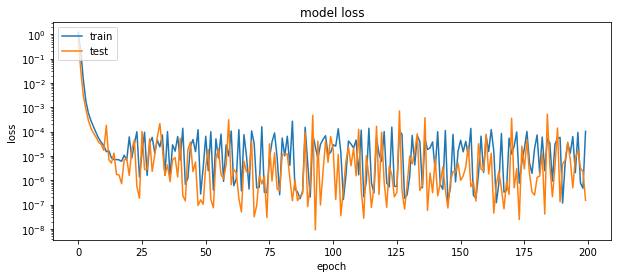

<Figure size 432x288 with 0 Axes>

In [11]:
# summarize history for loss
plt.figure(figsize=(10,4))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf()

In [12]:
print("Model Train MAE: " + str(mean_absolute_error(y_train, model.predict(X_train.values))))
print("Model Val MAE: " + str(mean_absolute_error(y_val, model.predict(X_val.values))))
print("Model Test MAE: " + str(mean_absolute_error(y_test, model.predict(X_test.values))))

Model Train MAE: 0.0003002605232455197
Model Val MAE: 0.0003027099888370838
Model Test MAE: 0.0002987876906243641


In [13]:
print("Model Train MAE: " + str(mean_squared_error(y_train, model.predict(X_train.values))))
print("Model Val MAE: " + str(mean_squared_error(y_val, model.predict(X_val.values))))
print("Model Test MAE: " + str(mean_squared_error(y_test, model.predict(X_test.values))))

Model Train MAE: 1.535193894844655e-07
Model Val MAE: 1.5235911282242161e-07
Model Test MAE: 1.5228529108590083e-07


In [14]:
print("Model Train MAE: " + str(mean_squared_log_error(y_train, model.predict(X_train.values))))
print("Model Val MAE: " + str(mean_squared_log_error(y_val, model.predict(X_val.values))))
print("Model Test MAE: " + str(mean_squared_log_error(y_test, model.predict(X_test.values))))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

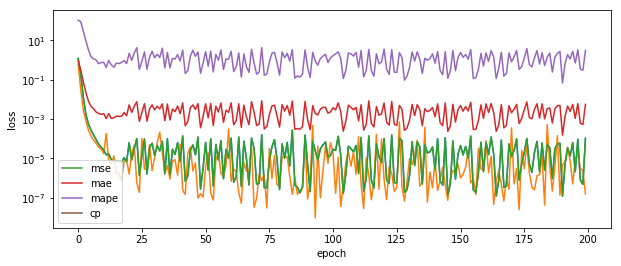

In [15]:
plt.figure(figsize=(10,4))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['mean_squared_error'], label='mse')
plt.plot(model.history.history['mean_absolute_error'], label='mae')
plt.plot(model.history.history['mean_absolute_percentage_error'], label='mape')
plt.plot(model.history.history['cosine_proximity'], label='cp')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend()

In [16]:
print("Q3: Is your model underfitting, overfitting, or neither? Neither")

Q3: Is your model underfitting, overfitting, or neither? Neither


In [17]:
model.save("ch2_model.h5")

In [18]:
del model

In [20]:
from keras.models import load_model
model2 = load_model('ch2_model.h5')

In [22]:
# retry number 2
model2.fit(x=X_train.values, y=y_train, batch_size=10, epochs=200, verbose=1, validation_data=(X_val.values, y_val))

Train on 3200 samples, validate on 2000 samples
Epoch 1/200
3200/3200 [==============================] - 2s 529us/step - loss: 1.1017e-07 - mean_absolute_error: 1.8639e-04 - mean_squared_error: 1.1017e-07 - mean_absolute_percentage_error: 0.0868 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 2.7501e-08 - val_mean_absolute_error: 1.1354e-04 - val_mean_squared_error: 2.7501e-08 - val_mean_absolute_percentage_error: 0.0503 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 2/200
3200/3200 [==============================] - 1s 379us/step - loss: 6.7576e-07 - mean_absolute_error: 4.9672e-04 - mean_squared_error: 6.7576e-07 - mean_absolute_percentage_error: 0.2314 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 8.2890e-07 - val_mean_absolute_error: 7.8202e-04 - val_mean_squared_error: 8.2890e-07 - val_mean_absolute_percentage_error: 0.3826 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 3/200
3200/3200 [==============================] - 1s 422us/step

Epoch 20/200
3200/3200 [==============================] - 1s 408us/step - loss: 1.1089e-07 - mean_absolute_error: 2.1875e-04 - mean_squared_error: 1.1089e-07 - mean_absolute_percentage_error: 0.0924 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 5.7094e-09 - val_mean_absolute_error: 3.3204e-05 - val_mean_squared_error: 5.7094e-09 - val_mean_absolute_percentage_error: 0.0126 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 21/200
3200/3200 [==============================] - 1s 405us/step - loss: 1.4318e-07 - mean_absolute_error: 2.5454e-04 - mean_squared_error: 1.4318e-07 - mean_absolute_percentage_error: 0.1022 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 6.8538e-08 - val_mean_absolute_error: 2.2643e-04 - val_mean_squared_error: 6.8538e-08 - val_mean_absolute_percentage_error: 0.1036 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 22/200
3200/3200 [==============================] - 1s 398us/step - loss: 3.6280e-05 - mean_absolute_error: 0.

Epoch 39/200
3200/3200 [==============================] - 1s 434us/step - loss: 4.2044e-07 - mean_absolute_error: 4.2310e-04 - mean_squared_error: 4.2044e-07 - mean_absolute_percentage_error: 0.1794 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 1.1188e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.1188e-06 - val_mean_absolute_percentage_error: 0.4600 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 40/200
3200/3200 [==============================] - 1s 387us/step - loss: 3.6076e-05 - mean_absolute_error: 0.0037 - mean_squared_error: 3.6076e-05 - mean_absolute_percentage_error: 1.6805 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 1.7363e-05 - val_mean_absolute_error: 0.0036 - val_mean_squared_error: 1.7363e-05 - val_mean_absolute_percentage_error: 1.5864 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 41/200
3200/3200 [==============================] - 1s 465us/step - loss: 3.2365e-05 - mean_absolute_error: 0.0043 - mean_

Epoch 58/200
3200/3200 [==============================] - 1s 430us/step - loss: 4.0149e-05 - mean_absolute_error: 0.0043 - mean_squared_error: 4.0149e-05 - mean_absolute_percentage_error: 1.8123 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 7.6643e-06 - val_mean_absolute_error: 0.0023 - val_mean_squared_error: 7.6643e-06 - val_mean_absolute_percentage_error: 0.9269 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 59/200
3200/3200 [==============================] - 1s 379us/step - loss: 5.3766e-05 - mean_absolute_error: 0.0040 - mean_squared_error: 5.3766e-05 - mean_absolute_percentage_error: 1.4850 - cosine_proximity: -0.9981 - acc: 0.0000e+00 - val_loss: 2.8200e-08 - val_mean_absolute_error: 1.0483e-04 - val_mean_squared_error: 2.8200e-08 - val_mean_absolute_percentage_error: 0.0489 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 60/200
3200/3200 [==============================] - 1s 377us/step - loss: 2.4448e-06 - mean_absolute_error: 0.0010 - mean_

Epoch 77/200
3200/3200 [==============================] - 2s 496us/step - loss: 8.5081e-06 - mean_absolute_error: 0.0021 - mean_squared_error: 8.5081e-06 - mean_absolute_percentage_error: 1.0024 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 8.2344e-06 - val_mean_absolute_error: 0.0026 - val_mean_squared_error: 8.2344e-06 - val_mean_absolute_percentage_error: 1.1338 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 78/200
3200/3200 [==============================] - 2s 497us/step - loss: 1.4705e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 1.4705e-05 - mean_absolute_percentage_error: 1.4943 - cosine_proximity: -0.9981 - acc: 0.0000e+00 - val_loss: 6.9521e-05 - val_mean_absolute_error: 0.0081 - val_mean_squared_error: 6.9521e-05 - val_mean_absolute_percentage_error: 3.5760 - val_cosine_proximity: -0.9940 - val_acc: 0.0000e+00
Epoch 79/200
3200/3200 [==============================] - 1s 446us/step - loss: 3.5789e-05 - mean_absolute_error: 0.0034 - mean_squa

Epoch 96/200
3200/3200 [==============================] - 2s 628us/step - loss: 3.6953e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 3.6953e-06 - mean_absolute_percentage_error: 0.8642 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 1.8402e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 1.8402e-06 - val_mean_absolute_percentage_error: 0.5573 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 97/200
3200/3200 [==============================] - 2s 618us/step - loss: 4.7791e-05 - mean_absolute_error: 0.0045 - mean_squared_error: 4.7791e-05 - mean_absolute_percentage_error: 2.0284 - cosine_proximity: -0.9969 - acc: 0.0000e+00 - val_loss: 2.1913e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 2.1913e-06 - val_mean_absolute_percentage_error: 0.6493 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 98/200
3200/3200 [==============================] - 2s 584us/step - loss: 2.5061e-07 - mean_absolute_error: 3.5320e-04 - mean_

Epoch 115/200
3200/3200 [==============================] - 3s 908us/step - loss: 7.1677e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 7.1677e-06 - mean_absolute_percentage_error: 0.9283 - cosine_proximity: -0.9987 - acc: 0.0000e+00 - val_loss: 6.9593e-08 - val_mean_absolute_error: 1.8645e-04 - val_mean_squared_error: 6.9593e-08 - val_mean_absolute_percentage_error: 0.0780 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 116/200
3200/3200 [==============================] - 3s 800us/step - loss: 2.5040e-05 - mean_absolute_error: 0.0032 - mean_squared_error: 2.5040e-05 - mean_absolute_percentage_error: 1.3335 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 3.4605e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 3.4605e-06 - val_mean_absolute_percentage_error: 0.7224 - val_cosine_proximity: -0.9980 - val_acc: 0.0000e+00
Epoch 117/200
3200/3200 [==============================] - 2s 691us/step - loss: 5.0556e-05 - mean_absolute_error: 0.0046 - me

3200/3200 [==============================] - 2s 719us/step - loss: 9.7333e-07 - mean_absolute_error: 6.7791e-04 - mean_squared_error: 9.7333e-07 - mean_absolute_percentage_error: 0.3314 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 2.4946e-07 - val_mean_absolute_error: 4.8152e-04 - val_mean_squared_error: 2.4946e-07 - val_mean_absolute_percentage_error: 0.2044 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 134/200
3200/3200 [==============================] - 2s 555us/step - loss: 1.8221e-05 - mean_absolute_error: 0.0024 - mean_squared_error: 1.8221e-05 - mean_absolute_percentage_error: 1.5212 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 9.7410e-05 - val_mean_absolute_error: 0.0096 - val_mean_squared_error: 9.7410e-05 - val_mean_absolute_percentage_error: 4.2310 - val_cosine_proximity: -0.9970 - val_acc: 0.0000e+00
Epoch 135/200
3200/3200 [==============================] - 2s 633us/step - loss: 6.4526e-05 - mean_absolute_error: 0.0035 - mean_squared

Epoch 152/200
3200/3200 [==============================] - 2s 499us/step - loss: 8.2385e-07 - mean_absolute_error: 4.8914e-04 - mean_squared_error: 8.2385e-07 - mean_absolute_percentage_error: 0.2084 - cosine_proximity: -1.0000 - acc: 0.0000e+00 - val_loss: 5.8886e-06 - val_mean_absolute_error: 0.0021 - val_mean_squared_error: 5.8886e-06 - val_mean_absolute_percentage_error: 0.8692 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 153/200
3200/3200 [==============================] - 2s 491us/step - loss: 4.2963e-05 - mean_absolute_error: 0.0047 - mean_squared_error: 4.2963e-05 - mean_absolute_percentage_error: 2.3208 - cosine_proximity: -0.9981 - acc: 0.0000e+00 - val_loss: 6.6304e-06 - val_mean_absolute_error: 0.0025 - val_mean_squared_error: 6.6304e-06 - val_mean_absolute_percentage_error: 1.1354 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 154/200
3200/3200 [==============================] - 1s 455us/step - loss: 7.7911e-06 - mean_absolute_error: 0.0018 - me

Epoch 171/200
3200/3200 [==============================] - 2s 599us/step - loss: 6.4555e-06 - mean_absolute_error: 0.0017 - mean_squared_error: 6.4555e-06 - mean_absolute_percentage_error: 0.8269 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 5.9295e-06 - val_mean_absolute_error: 0.0020 - val_mean_squared_error: 5.9295e-06 - val_mean_absolute_percentage_error: 0.8398 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 172/200
3200/3200 [==============================] - 2s 596us/step - loss: 1.6768e-05 - mean_absolute_error: 0.0026 - mean_squared_error: 1.6768e-05 - mean_absolute_percentage_error: 1.1590 - cosine_proximity: -0.9994 - acc: 0.0000e+00 - val_loss: 4.5479e-06 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 4.5479e-06 - val_mean_absolute_percentage_error: 0.7921 - val_cosine_proximity: -0.9990 - val_acc: 0.0000e+00
Epoch 173/200
3200/3200 [==============================] - 3s 811us/step - loss: 7.4784e-05 - mean_absolute_error: 0.0058 - mean_s

Epoch 190/200
3200/3200 [==============================] - 2s 506us/step - loss: 2.1951e-05 - mean_absolute_error: 0.0030 - mean_squared_error: 2.1951e-05 - mean_absolute_percentage_error: 1.3464 - cosine_proximity: -0.9975 - acc: 0.0000e+00 - val_loss: 7.6406e-05 - val_mean_absolute_error: 0.0084 - val_mean_squared_error: 7.6406e-05 - val_mean_absolute_percentage_error: 3.7353 - val_cosine_proximity: -0.9950 - val_acc: 0.0000e+00
Epoch 191/200
3200/3200 [==============================] - 2s 506us/step - loss: 6.1631e-05 - mean_absolute_error: 0.0051 - mean_squared_error: 6.1631e-05 - mean_absolute_percentage_error: 2.0521 - cosine_proximity: -0.9987 - acc: 0.0000e+00 - val_loss: 3.6019e-07 - val_mean_absolute_error: 4.9502e-04 - val_mean_squared_error: 3.6019e-07 - val_mean_absolute_percentage_error: 0.1994 - val_cosine_proximity: -1.0000 - val_acc: 0.0000e+00
Epoch 192/200
3200/3200 [==============================] - 2s 519us/step - loss: 2.0417e-07 - mean_absolute_error: 2.8976e-04 

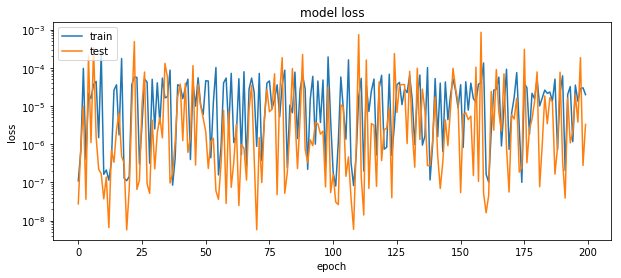

<Figure size 432x288 with 0 Axes>

In [24]:
# summarize history for loss
plt.figure(figsize=(10,4))
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf()

In [25]:
print("Model Train MAE: " + str(mean_absolute_error(y_train, model.predict(X_train.values))))
print("Model Val MAE: " + str(mean_absolute_error(y_val, model.predict(X_val.values))))
print("Model Test MAE: " + str(mean_absolute_error(y_test, model.predict(X_test.values))))

Model Train MAE: 0.0003002605232455197
Model Val MAE: 0.0003027099888370838
Model Test MAE: 0.0002987876906243641
